<a href="https://colab.research.google.com/github/RoetGer/decisions-under-uncertainty/blob/main/generalized_factorization_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install tf2_fm_zoo

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


Epoch 1/100
27/27 [==============================] - 1s 8ms/step - loss: 661.3490 - val_loss: 304.7079
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 623.2602 - val_loss: 301.8935
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 595.9566 - val_loss: 298.5860
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 576.5758 - val_loss: 294.5713
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 626.8230 - val_loss: 289.9237
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 618.4717 - val_loss: 284.6490
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 591.4602 - val_loss: 278.7234
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 570.6618 - val_loss: 271.9456
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 580.1591 - val_loss: 264.8368
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss:

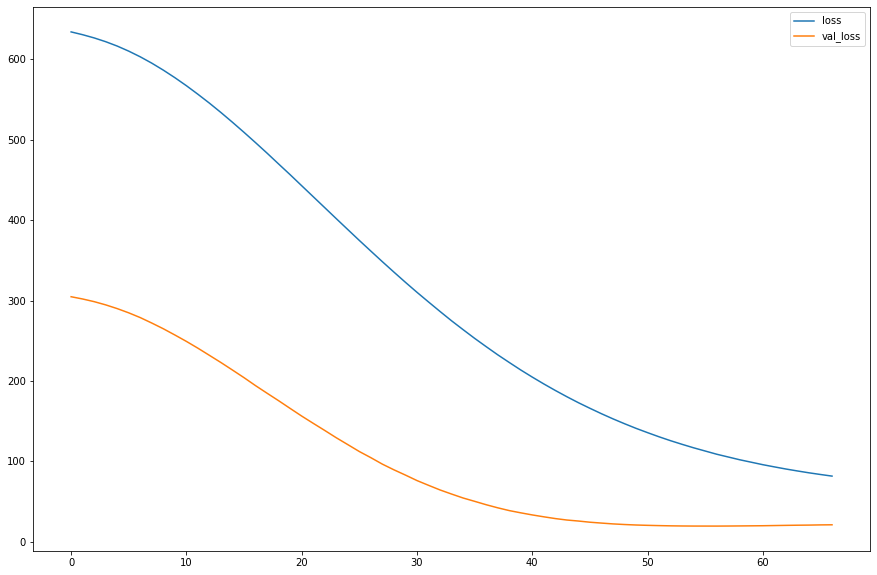

In [68]:
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.datasets import load_boston

from fm_zoo.fm import FactorizationMachine


X, y = load_boston(return_X_y=True)

X = X[:,:3]
y = tf.cast(y, dtype=tf.float32)

kbd = KBinsDiscretizer(n_bins=15, encode="ordinal")

nunique_vals = pd.DataFrame(X).nunique()
X = tf.cast(kbd.fit_transform(X), dtype=tf.int64)

fm = FactorizationMachine(
    feature_cards=tf.cast(nunique_vals, tf.int32), 
    factor_dim=3)

fm.compile(loss=tf.keras.losses.mean_squared_error, optimizer="Adam")
hist = fm.fit(
    X, y, 
    validation_split=0.15, 
    batch_size=16,
    epochs=100,
    callbacks=[
      tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ])

pd.DataFrame(hist.history).plot(figsize=(15,10))

In [64]:
??fm.fit

Epoch 1/50
16/16 [==============================] - 1s 1ms/step - loss: 1.6209
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 1.4831
Epoch 3/50
16/16 [==============================] - 0s 1ms/step - loss: 1.2880
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 1.1223
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 1.1587
Epoch 6/50
16/16 [==============================] - 0s 1ms/step - loss: 0.9622
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9979
Epoch 8/50
16/16 [==============================] - 0s 1ms/step - loss: 0.9115
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 1.0340
Epoch 10/50
16/16 [==============================] - 0s 1ms/step - loss: 0.9856
Epoch 11/50
16/16 [==============================] - 0s 1ms/step - loss: 1.0410
Epoch 12/50
16/16 [==============================] - 0s 1ms/step - loss: 0.9986
Epoch 13/50
16/16 [==============================

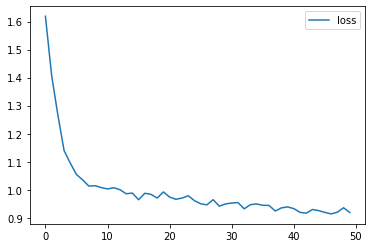

In [61]:
mdl = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(5)),
    tf.keras.layers.Dense(10, activation=tf.keras.layers.LeakyReLU()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)                            
])

mdl.compile(
    loss="mse",
    optimizer="rmsprop")

inp = tf.random.normal(shape=(500,5))
target = tf.random.normal(shape=(500,1))

hist = mdl.fit(inp, target, batch_size=32, epochs=50)
pd.DataFrame(hist.history).plot()

In [53]:
fm.predict(X)

array([[0.48257238],
       [0.55737823],
       [0.55737823],
       [0.5582001 ],
       [0.6179424 ],
       [0.5582001 ],
       [0.49677452],
       [0.50840414],
       [0.55747545],
       [0.55747545],
       [0.49024242],
       [0.50840414],
       [0.49677452],
       [0.4901852 ],
       [0.4901852 ],
       [0.4901852 ],
       [0.4901852 ],
       [0.4901852 ],
       [0.4901852 ],
       [0.4901852 ],
       [0.54042417],
       [0.4901852 ],
       [0.54042417],
       [0.4901852 ],
       [0.4901852 ],
       [0.4901852 ],
       [0.4901852 ],
       [0.4901852 ],
       [0.4901852 ],
       [0.4901852 ],
       [0.4901852 ],
       [0.54042417],
       [0.54042417],
       [0.4901852 ],
       [0.54042417],
       [0.5948064 ],
       [0.5136728 ],
       [0.5948064 ],
       [0.57338154],
       [0.5028088 ],
       [0.54654753],
       [0.543584  ],
       [0.543584  ],
       [0.5930207 ],
       [0.543584  ],
       [0.5930207 ],
       [0.5930207 ],
       [0.524

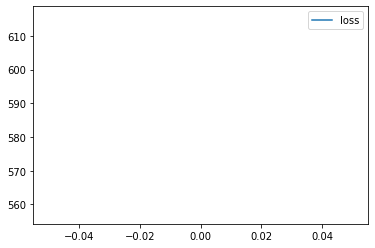

In [50]:
pd.DataFrame(hist.history).plot()

In [41]:
fm(tf.cast(X, dtype=tf.int64))

<tf.Tensor: shape=(506, 1), dtype=float32, numpy=
array([[0.2919633 ],
       [0.25897792],
       [0.25897792],
       [0.22296599],
       [0.24901795],
       [0.22296599],
       [0.24353305],
       [0.230096  ],
       [0.21192904],
       [0.21192904],
       [0.296324  ],
       [0.230096  ],
       [0.24353305],
       [0.33529255],
       [0.33529255],
       [0.33529255],
       [0.33529255],
       [0.33529255],
       [0.33529255],
       [0.33529255],
       [0.29218113],
       [0.33529255],
       [0.29218113],
       [0.33529255],
       [0.33529255],
       [0.33529255],
       [0.33529255],
       [0.33529255],
       [0.33529255],
       [0.33529255],
       [0.33529255],
       [0.29218113],
       [0.29218113],
       [0.33529255],
       [0.29218113],
       [0.2762244 ],
       [0.26572493],
       [0.2762244 ],
       [0.23570503],
       [0.28262508],
       [0.29581124],
       [0.26099578],
       [0.26099578],
       [0.24189958],
       [0.26099578],
     

In [27]:
a, b = np.unique(X, return_counts=True)

In [38]:
X

<tf.Tensor: shape=(506, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [0., 0., 5.],
       [0., 0., 5.],
       ...,
       [2., 0., 8.],
       [4., 0., 8.],
       [2., 0., 8.]], dtype=float32)>